5.1) Add the "PCA" class in the "pca.py" module on the "decomposition" sub-package. Consider the PCA class structure presented in the next slide.

In [24]:
import sys
import numpy as np
sys.path.append("/Users/utilizador/Documents/GitHub/si/src")
import matplotlib.pyplot as plt
from si.io.csv_file import read_csv
from si.data.dataset import Dataset

class PCA:
    """
    Principal Component Analysis (PCA) is a linear algebra technique used to reduce the dimensions
    of the dataset. The PCA to be implemented must use eigenvalue
    decomposition of the covariance matrix of the data.
    
    Parameters:
    -----------
    
    n_components: int, default=2
    
    Returns:
    -----------
    
    PCA object
    
    """
    
    def __init__(self, n_components:int):
        
        self.n_components = n_components
        self.components: np.ndarray = None # Inicializa os componentes principais (vetores próprios) como None.
        self.mean: np.ndarray = None
        self.explained_variance: np.ndarray = None
        
    
    def fit(self, Dataset: Dataset)-> tuple:
        """
        Fit the PCA model to the data
        
        Parameters:
        -----------
        
        X: numpy array
            The data to fit the PCA model to
            
        Returns:
        -----------
        
        self: PCA
            The fitted PCA model
            
        """
        
        if self.n_components > Dataset.X.shape[1]-1:
            raise ValueError("The number of components should be less than the number of features in the dataset.")

        
        self.mean= np.mean(Dataset.X, axis=0)
        X_centered= np.subtract(Dataset.X, self.mean) # Centraliza os dados subtraindo a média.
        
        covariance= np.cov(X_centered, rowvar=False)# covariance matrix
        
        eigen_values, eigen_vectors= np.linalg.eig(covariance)# Realiza a decomposição em valores e vetores próprios.
        
        sorted_indices = np.argsort(eigen_values)[::-1]
        eigen_values_sorted = eigen_values[sorted_indices]
        eigen_vectors_sorted = eigen_vectors[:, sorted_indices]
        
        self.components= eigen_vectors_sorted[:, :self.n_components] # seleciona todas as linhas e posteriormente seleciona n colunas
        
        self.explained_variance = eigen_values_sorted[:self.n_components] / np.sum(eigen_values)

        return self
        
    def transform (self, Dataset: Dataset)->tuple:
        
        """
        
        ----------
        dataset (Dataset): Dataset object
        """
        X_centered= np.subtract(Dataset.X, self.mean)
        
        X_reduced= np.dot(X_centered,self.components)
        
        return X_reduced
        
    
    def plot_variance_explained(self):
        """
        Creates a bar plot of the variances explained by the principal components.
        """
        if self.explained_variance is not None:
            explained_variance_normalized = self.explained_variance / sum(self.explained_variance) #normalize soma = 1
            print(explained_variance_normalized)

            num_pcs = len(self.explained_variance)
            x_indices = range(1, num_pcs + 1)

            plt.bar(x_indices, explained_variance_normalized, align='center')
            plt.xlabel('Pincipal component (PC)')
            plt.ylabel('Explained variance normalized')
            plt.title('Explained variance by PC')
            plt.xticks(x_indices,[f'PC{i}' for i in x_indices])
            plt.show()
        else:
            print("The principal components and explained variances have not yet been calculated.")   







5.2) Test the PCA class in a jupyter notebook using the iris.csv dataset (classificação).

In [22]:
Path= "/Users/utilizador/Documents/GitHub/si/datasets/iris/"
data = read_csv(Path + "iris.csv", sep=",", label=True)
data.summary()

,feat_0,feat_1,feat_2,feat_3
mean,5.843333,3.054000,3.758667,1.198667
median,5.800000,3.000000,4.350000,1.300000
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000
var,0.681122,0.186751,3.092425,0.578532


[0.92943354 0.05329178 0.01727468]


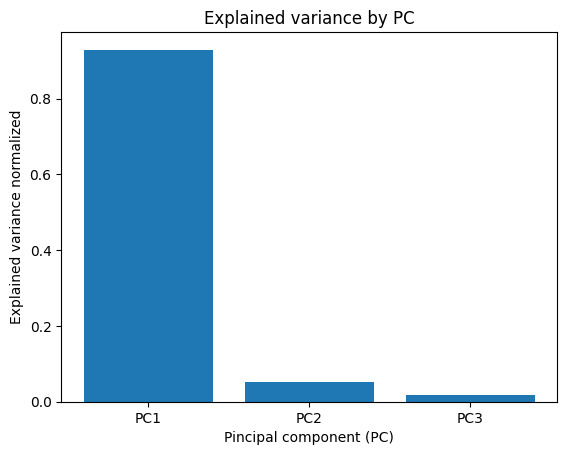

In [26]:
pca = PCA(n_components=3)
pca.fit(data)
X_reduced = pca.transform(data)
pca.plot_variance_explained()
